In [1]:
from collections import Counter
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open("topo_data.json", "r") as file:
    data = json.load(file)

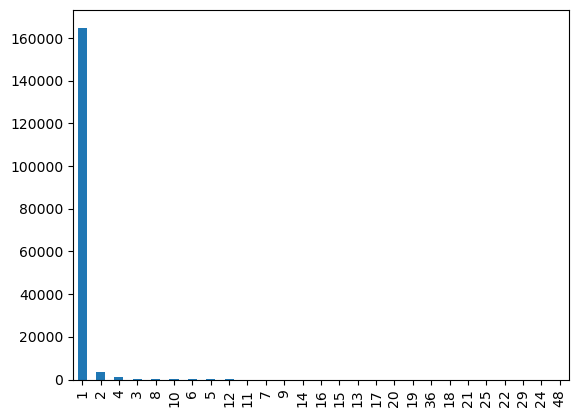

In [3]:
interp = [len(x["topology"]) for x in data.values()]
_ = pd.Series(interp).value_counts().plot(kind="bar")

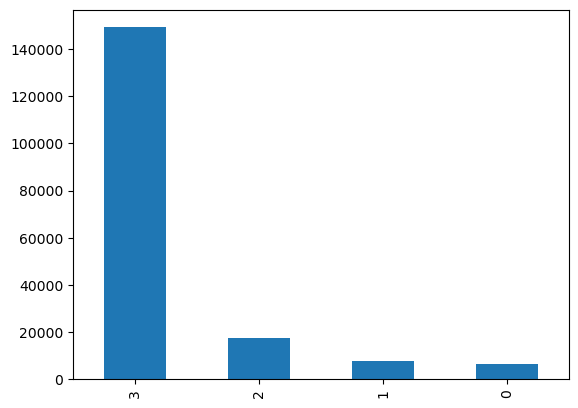

In [4]:
dim = pd.Series([y[1] for x in data.values() for y in x["topology"]])
_ = dim.value_counts().plot(kind="bar")

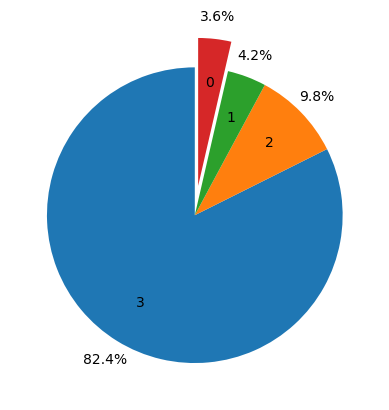

In [5]:
_ = dim.value_counts().plot(kind="pie", autopct='%1.1f%%', explode=(0, 0, 0, 0.2), startangle=90, ylabel='',
                            pctdistance=1.15, labeldistance=.7,
                            textprops = {'ha': 'center'})
plt.savefig('histo_dim.pdf')

In [6]:
dim.value_counts()

3    149204
2     17691
1      7689
0      6534
Name: count, dtype: int64

In [7]:
unknowns = Counter([y[2] for x in data.values() for y in x["topology"] if "UNKNOWN" in y[2]])
unstables = Counter([y[2] for x in data.values() for y in x["topology"] if "unstable" in y[2]])

mapping = {}
for i, (k, _) in enumerate(unknowns.most_common()):
    mapping[k] = f"unnamed-{i}"

# The first one is the rod type
assert unknowns.most_common(1)[0][0] == "UNKNOWN 1 1 1 1"
mapping["UNKNOWN 1 1 1 1"] = "rod"

for i, (k, _) in enumerate(unstables.most_common()):
    mapping[k] = f"unstable-{i+1}"

In [8]:
print("Number of unstable nets:", sum(1 for x in data.values() for y in x["topology"] if "unstable" in y[2]))
print("Number of unstable 3D nets:", sum(1 for x in data.values() for y in x["topology"] if "unstable" in y[2] and y[1] == 3))
print("Number of unstable 2D nets:", sum(1 for x in data.values() for y in x["topology"] if "unstable" in y[2] and y[1] == 2))
print("Number of unstable 1D nets:", sum(1 for x in data.values() for y in x["topology"] if "unstable" in y[2] and y[1] == 1))
print("Number of unstable 0D nets:", sum(1 for x in data.values() for y in x["topology"] if "unstable" in y[2] and y[1] == 0))

Number of unstable nets: 8874
Number of unstable 3D nets: 152
Number of unstable 2D nets: 7592
Number of unstable 1D nets: 1130
Number of unstable 0D nets: 0


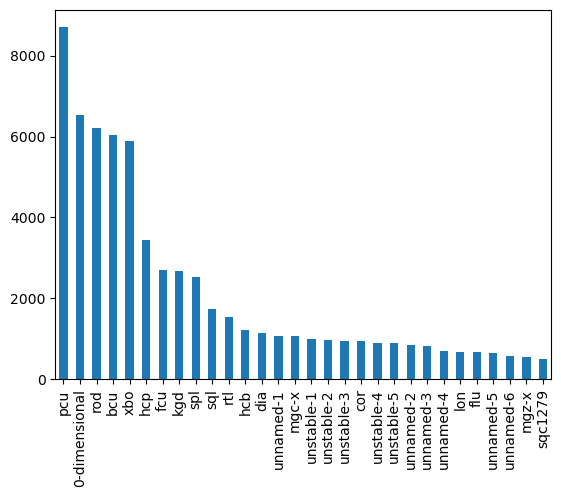

In [9]:
def short(net):
    if "UNKNOWN" in net or "unstable" in net:
        return mapping[net]
    else:
        return net

net = pd.Series([short(y[2]) for x in data.values() for y in x["topology"]])
_ = net.value_counts()[:30].plot(kind="bar")

In [10]:
# Find representatives of unstable nets, preferably with only one net in order to make things simpler
for i in range(1, 11):
    name = "unstable-" + str(i)
    print(name)
    l = [x for x in data.values() if len(x["topology"]) == 1 for y in x["topology"] if short(y[2]) == name]
    if len(l) == 0:
        l = [x for x in data.values() for y in x["topology"] if short(y[2]) == name]
    print([x['material_id'] for x in l[:8]])

unstable-1
['mp-1023924', 'mp-1023926', 'mp-1023934', 'mp-1023935', 'mp-1023936', 'mp-1080279', 'mp-1874', 'mp-2647020']
unstable-2
['mp-1023938', 'mp-1023942', 'mp-1027525', 'mp-1027692', 'mp-1028698', 'mp-1080325', 'mp-1102379', 'mp-1102379']
unstable-3
['mp-624889', 'mp-1217790', 'mp-1188682', 'mp-1191759', 'mp-1019733', 'mp-1020671', 'mp-1196716', 'mp-1197536']
unstable-4
['mp-555293', 'mp-1208590']
unstable-5
['mp-1080309', 'mp-7926', 'mp-1080325', 'mp-571133', 'mp-637232', 'mp-10000', 'mp-1094532', 'mp-1206927']
unstable-6
['mp-1180050', 'mp-1239169', 'mp-1065860', 'mp-1205474', 'mp-1189600', 'mp-726717', 'mp-654937', 'mp-1181155']
unstable-7
['mp-1181342', 'mp-1180203', 'mp-541656', 'mp-684670', 'mp-625576', 'mp-758558', 'mp-675953', 'mp-780960']
unstable-8
['mp-1080203', 'mp-995184', 'mp-1001079', 'mp-1179276', 'mp-27281', 'mp-546920', 'mp-632417', 'mp-989459']
unstable-9
['mp-1071539', 'mp-1014286', 'mp-1103186', 'mp-1213803', 'mp-613227', 'mp-1190485', 'mp-3199', 'mp-4649']
u

Number of types of named nets: 660


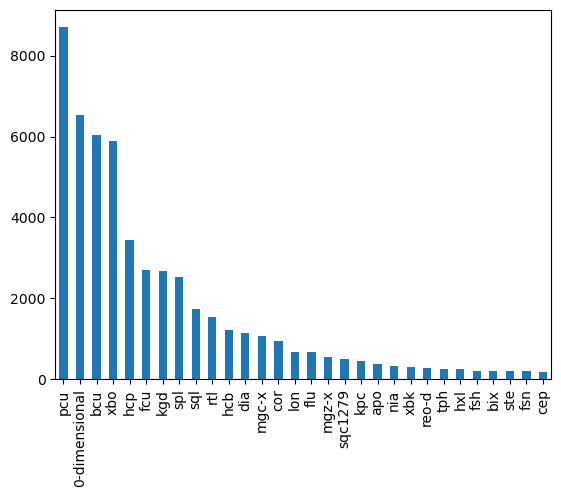

In [11]:
named_net = pd.Series([y[2] for x in data.values() for y in x["topology"] if "unstable" not in y[2] and "UNKNOWN" not in y[2]])
_ = named_net.value_counts()[:30].plot(kind="bar")
print("Number of types of named nets:", len(named_net.unique()))

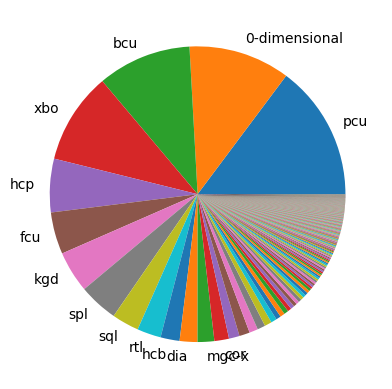

In [12]:
counts = Counter(named_net)
_ = plt.pie([float(v) for _, v in counts.most_common()], labels=[k if v > 800 else '' for k, v in counts.most_common()], autopct=None)

Number of types of 3D nets: 40246


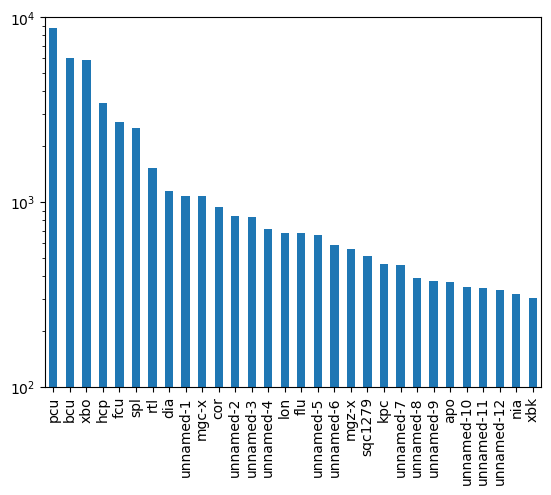

In [13]:
net_3d = pd.Series([short(y[2]) for x in data.values() for y in x["topology"] if y[1] == 3])
_ = net_3d.value_counts()[:30].plot(kind="bar", log=True, ylim=(100, 10000))
print("Number of types of 3D nets:", len(net_3d.unique()))

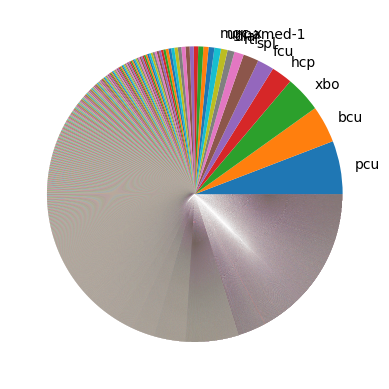

In [14]:
counts = Counter(net_3d)
_ = plt.pie([float(v) for _, v in counts.most_common()], labels=[k if v > 1000 else '' for k, v in counts.most_common()], autopct=None)

In [15]:
print("Number of materials with top 20 3D nets:", sum(v for _, v in counts.most_common(20)))
print("Number of materials with top 100 3D nets:", sum(v for _, v in counts.most_common(100)))
print("Number of 3D nets that occur only once:", sum(1 for _, v in counts.most_common() if v == 1))
print("Total number of different 3D nets encountered:", len(counts))
print("Total number of materials with 3D nets:", len(net_3d))
print("Number of occurences of the most common:", counts.most_common(1))

Number of materials with top 20 3D nets: 41131
Number of materials with top 100 3D nets: 56793
Number of 3D nets that occur only once: 30101
Total number of different 3D nets encountered: 40246
Total number of materials with 3D nets: 149204
Number of occurences of the most common: [('pcu', 8702)]


In [16]:
print("Number of materials with 3D unnamed net:", sum(v for k, v in counts.most_common() if "unnamed" in k))
print("Number of types of unnamed 3D nets encountered:", sum(1 for k, v in counts.most_common() if "unnamed" in k))

Number of materials with 3D unnamed net: 103320
Number of types of unnamed 3D nets encountered: 39533


In [17]:
counts.most_common(30)

[('pcu', 8702),
 ('bcu', 6044),
 ('xbo', 5882),
 ('hcp', 3443),
 ('fcu', 2699),
 ('spl', 2528),
 ('rtl', 1538),
 ('dia', 1143),
 ('unnamed-1', 1080),
 ('mgc-x', 1074),
 ('cor', 940),
 ('unnamed-2', 843),
 ('unnamed-3', 830),
 ('unnamed-4', 711),
 ('lon', 682),
 ('flu', 678),
 ('unnamed-5', 659),
 ('unnamed-6', 587),
 ('mgz-x', 556),
 ('sqc1279', 512),
 ('kpc', 461),
 ('unnamed-7', 454),
 ('unnamed-8', 389),
 ('unnamed-9', 375),
 ('apo', 369),
 ('unnamed-10', 346),
 ('unnamed-11', 344),
 ('unnamed-12', 335),
 ('nia', 317),
 ('xbk', 302)]

Number of types of 2D nets: 3430


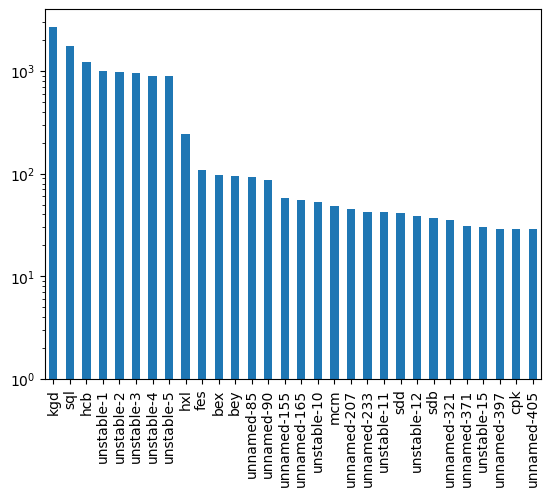

In [18]:
net_2d = pd.Series([short(y[2]) for x in data.values() for y in x["topology"] if y[1] == 2])
# net_2d = net_2d[~net_2d.isin(["unknown", "unstable", "non-periodic"])]
_ = net_2d.value_counts()[:30].plot(kind="bar", log=True)
print("Number of types of 2D nets:", len(net_2d.unique()))

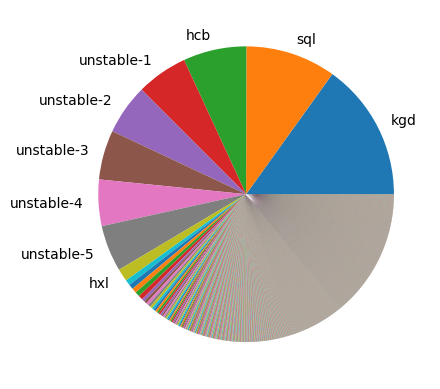

In [19]:
counts = Counter(net_2d)
_ = plt.pie([float(v) for _, v in counts.most_common()], labels=[k if v > 120 else '' for k, v in counts.most_common()], autopct=None)

Number of types of 1D nets: 108


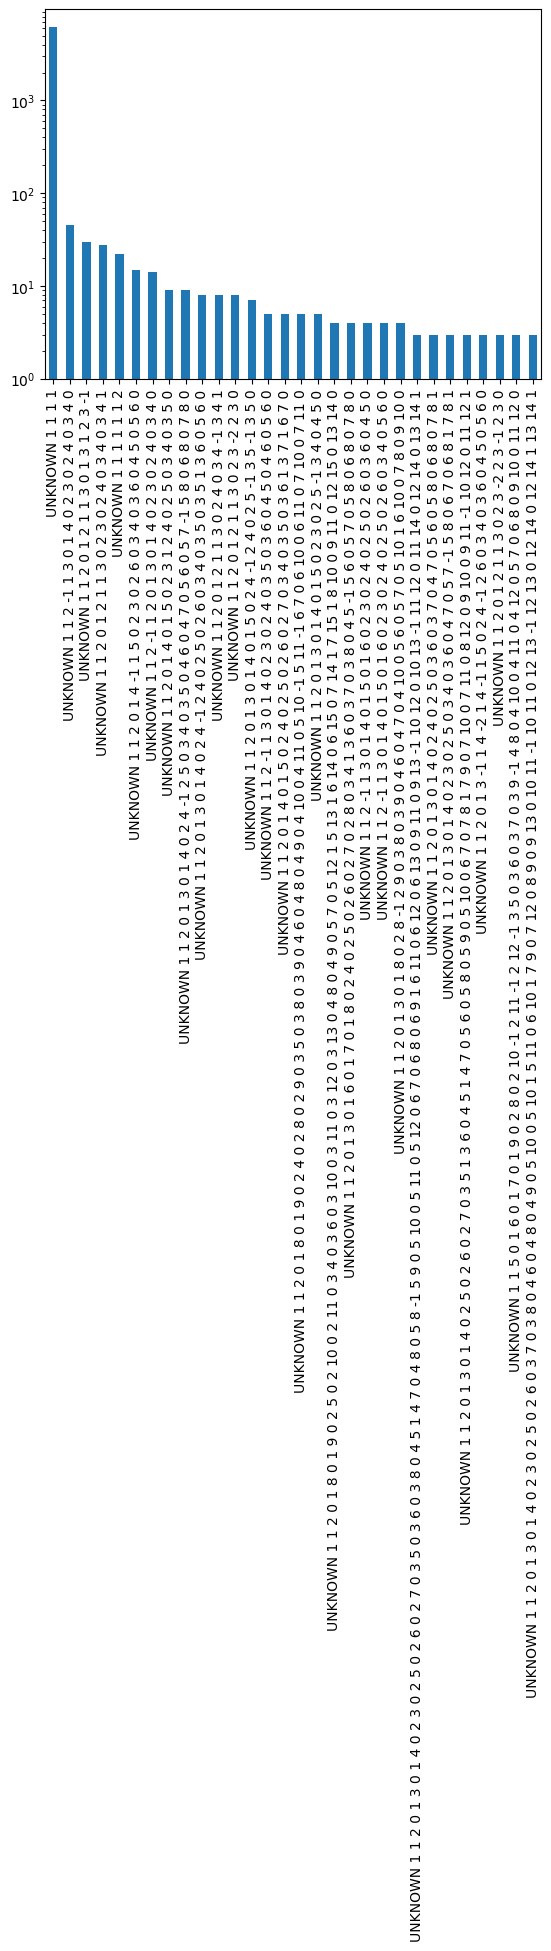

In [20]:
net_1d = pd.Series([y[2] for x in data.values() for y in x["topology"] if y[1] == 1 and "unstable" not in y[2]])
_ = net_1d.value_counts()[:30].plot(kind="bar", log=True)
print("Number of types of 1D nets:", len(net_1d.unique()))

In [21]:
print("Number of materials with rod nets:", net_1d.value_counts().iloc[0])
print("Number of materials with 1D nets:", len(net_1d))

Number of materials with rod nets: 6221
Number of materials with 1D nets: 6559


In [22]:
unk_1 = [x for x in data.values() for y in x["topology"] if short(y[2]) == "unnamed-1"]
unk_1[:20]

[{'material_id': 'mp-1340624',
  'formula_pretty': 'CaSbO3',
  'nelements': 3,
  'theoretical': True,
  'is_stable': None,
  'crystal_system': 'Monoclinic',
  'space_group': 11,
  'coordination': [['Sb', 6], ['Ca', 8], ['O', 4], ['O', 5]],
  'bonds': [['Sb', 'O'], ['Ca', 'O']],
  'topology': [[1,
    3,
    'UNKNOWN 3 1 2 0 0 0 1 3 0 0 0 1 4 0 0 0 1 5 0 0 0 2 6 0 0 0 2 7 0 0 0 2 8 0 0 0 2 9 0 0 0 2 10 0 0 0 2 11 0 0 0 2 12 0 0 0 3 6 -1 1 0 3 7 -1 0 0 3 9 -1 0 0 3 11 0 -1 0 3 12 0 -1 0 3 13 0 0 0 3 14 0 0 0 4 7 -1 1 0 4 8 0 0 0 4 11 0 0 0 4 13 0 0 0 4 15 0 0 0 5 9 -1 1 0 5 10 0 0 0 5 12 0 0 0 5 14 0 0 0 5 15 0 0 1 6 16 0 0 0 6 17 0 0 0 7 16 0 1 0 7 18 0 0 0 8 16 0 0 0 8 18 0 0 0 8 19 0 0 0 9 17 0 1 0 9 18 0 0 1 10 17 0 0 0 10 18 0 0 1 10 19 0 0 1 11 16 0 1 0 11 19 0 1 0 12 17 0 1 0 12 19 0 1 1 13 16 -1 1 0 13 18 -1 1 0 13 19 0 0 0 14 17 -1 1 0 14 18 -1 1 1 14 19 0 0 1 15 18 -1 1 0 15 19 0 1 0 16 20 0 0 0 17 20 0 0 1 18 20 0 1 0 19 20 0 0 0']]},
 {'material_id': 'mp-1639105',
  'formula_

In [23]:
unk_2 = [x for x in data.values() for y in x["topology"] if short(y[2]) == "unnamed-2"]
unk_2[:20]

[{'material_id': 'mp-1749',
  'formula_pretty': 'CaAl4',
  'nelements': 2,
  'theoretical': False,
  'is_stable': None,
  'crystal_system': 'Tetragonal',
  'space_group': 139,
  'coordination': [['Al', 8], ['Al', 9], ['Ca', 16]],
  'bonds': [['Al', 'Al'], ['Ca', 'Al']],
  'topology': [[1,
    3,
    'UNKNOWN 3 1 2 -2 1 1 1 2 -1 0 0 1 2 -1 0 1 1 2 0 0 0 1 3 -1 1 0 1 3 0 0 0 1 4 -1 0 0 1 4 0 0 0 2 3 -1 1 0 2 3 0 0 0 2 3 0 1 0 2 3 1 0 0 2 4 0 0 -1 2 4 1 -1 -1 2 4 1 0 -1 2 4 2 -1 -1 2 5 -2 1 1 2 5 -1 0 0 2 5 -1 0 1 2 5 0 0 0 3 4 1 -1 -1 3 5 -2 0 1 3 5 -1 0 1 4 5 -2 1 1 4 5 -1 0 1']]},
 {'material_id': 'mp-1827',
  'formula_pretty': 'SrGa4',
  'nelements': 2,
  'theoretical': False,
  'is_stable': None,
  'crystal_system': 'Tetragonal',
  'space_group': 139,
  'coordination': [['Ga', 8], ['Sr', 16], ['Ga', 9]],
  'bonds': [['Sr', 'Ga'], ['Ga', 'Ga']],
  'topology': [[1,
    3,
    'UNKNOWN 3 1 2 -2 1 1 1 2 -1 0 0 1 2 -1 0 1 1 2 0 0 0 1 3 -1 1 0 1 3 0 0 0 1 4 -1 0 0 1 4 0 0 0 2 3 -1 1 0 2 3 